In [1]:
from utils.gmsh_function import *
from utils.frequency_sweep import *
from efield.efield4 import *

In [2]:
mesh_name = "strip_gmsh.msh"
save_mesh_folder = 'data/gmsh_files/'
radiate_strip_mat_gmsh = 'data/antennas_mesh/radiate_strip_gmsh.mat'
radiate_strip_msh_gmsh = save_mesh_folder + mesh_name

In [3]:

gmsh.initialize()
model_name  = "strip_antenna"
longueur = 20 / 1000
hauteur = 2
print(f"Longueur: {longueur} m, Hauteur: {hauteur} m")
feed_point = np.array([0, 0, 0])

# Création du modèle
gmsh.model.add(model_name)
strip_antenna = gmsh.model.occ.addRectangle(-longueur / 2, -hauteur / 2, 0, longueur, hauteur)

apply_mesh_size(longueur*5)

gmsh.model.mesh.generate(2)
# run()

write(save_mesh_folder, mesh_name)

gmsh.finalize()

extract_msh_to_mat(radiate_strip_msh_gmsh, radiate_strip_mat_gmsh)

Longueur: 0.02 m, Hauteur: 2 m


radiate_strip_msh_gmsh = create_antenna_surface(create_strip, feed_point, feed_lenght, angle, meshSize, mesh_name, save_mesh_folder, high_current_points_list=np.array([3, 0]), iteration=0)

extract_radiation_msh_to_mat(radiate_strip_msh_gmsh, mesh_name, radiate_strip_mat_gmsh)

impedance, current_strip = radiation_algorithm(radiate_strip_mat_gmsh, 75e6, feed_point)

In [4]:
start_frequency = 60e6
stop_frequency = 90e6
frequencies = generate_freq_step(start_frequency, stop_frequency, step=2e5)
result_freq_sweep = frequency_sweep(radiate_strip_mat_gmsh, frequencies, feed_point)

Max Current value = 0.39600384127920696 [A/m]
Simulation 1/151 | f = 60.00 MHz | S11 = -2.06 dB
Max Current value = 0.4022664294835531 [A/m]
Simulation 2/151 | f = 60.20 MHz | S11 = -2.14 dB
Max Current value = 0.40867424844952516 [A/m]
Simulation 3/151 | f = 60.40 MHz | S11 = -2.22 dB
Max Current value = 0.41522992712408147 [A/m]
Simulation 4/151 | f = 60.60 MHz | S11 = -2.31 dB
Max Current value = 0.42193590104030854 [A/m]
Simulation 5/151 | f = 60.80 MHz | S11 = -2.40 dB
Max Current value = 0.42879436852661645 [A/m]
Simulation 6/151 | f = 61.00 MHz | S11 = -2.49 dB
Max Current value = 0.435807241086697 [A/m]
Simulation 7/151 | f = 61.20 MHz | S11 = -2.59 dB
Max Current value = 0.4429760873652249 [A/m]
Simulation 8/151 | f = 61.40 MHz | S11 = -2.70 dB
Max Current value = 0.45030207009200957 [A/m]
Simulation 9/151 | f = 61.60 MHz | S11 = -2.80 dB
Max Current value = 0.457785875383907 [A/m]
Simulation 10/151 | f = 61.80 MHz | S11 = -2.92 dB
Max Current value = 0.4654276337842304 [A/m]


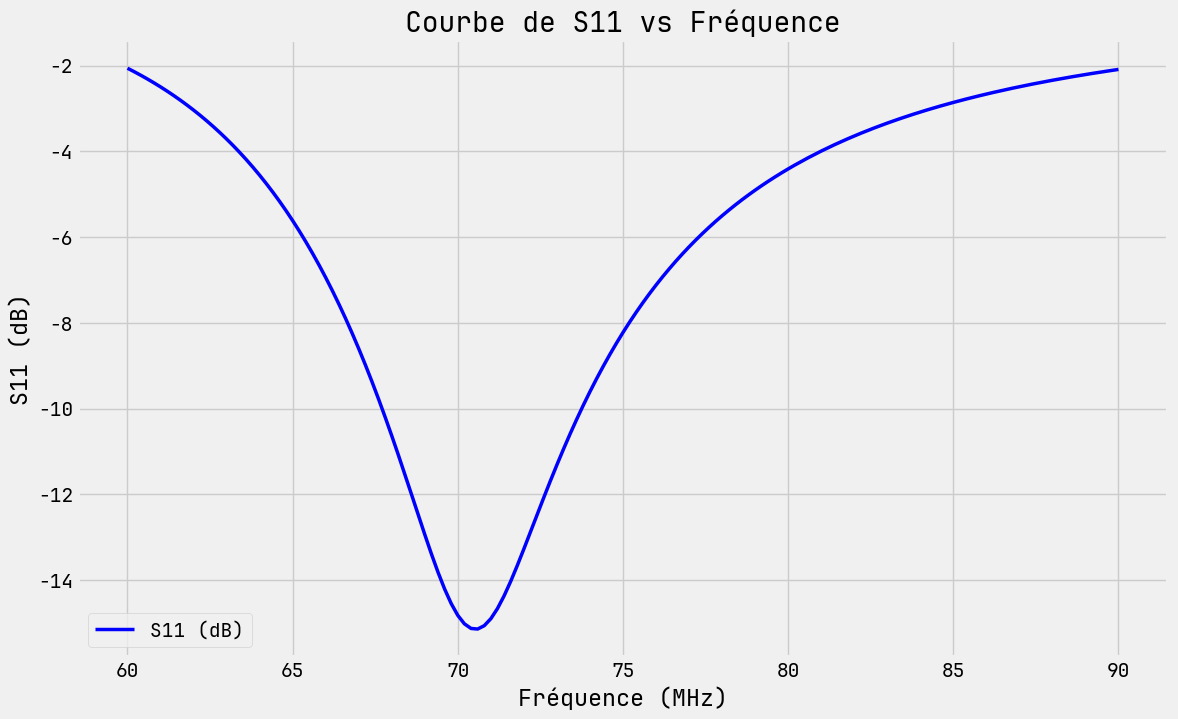

In [5]:
frequencies, impedances, s11_db, *_ = load_freq_sweep_data(result_freq_sweep)
plot_s11_curve(s11_db, start_frequency, stop_frequency)

In [6]:
# Charger les données CST
cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_strip.txt", skiprows=3)
cst_freq_mhz = cst_data_1[:, 0]  # fréquence déjà en MHz
cst_s11_db = cst_data_1[:, 1]

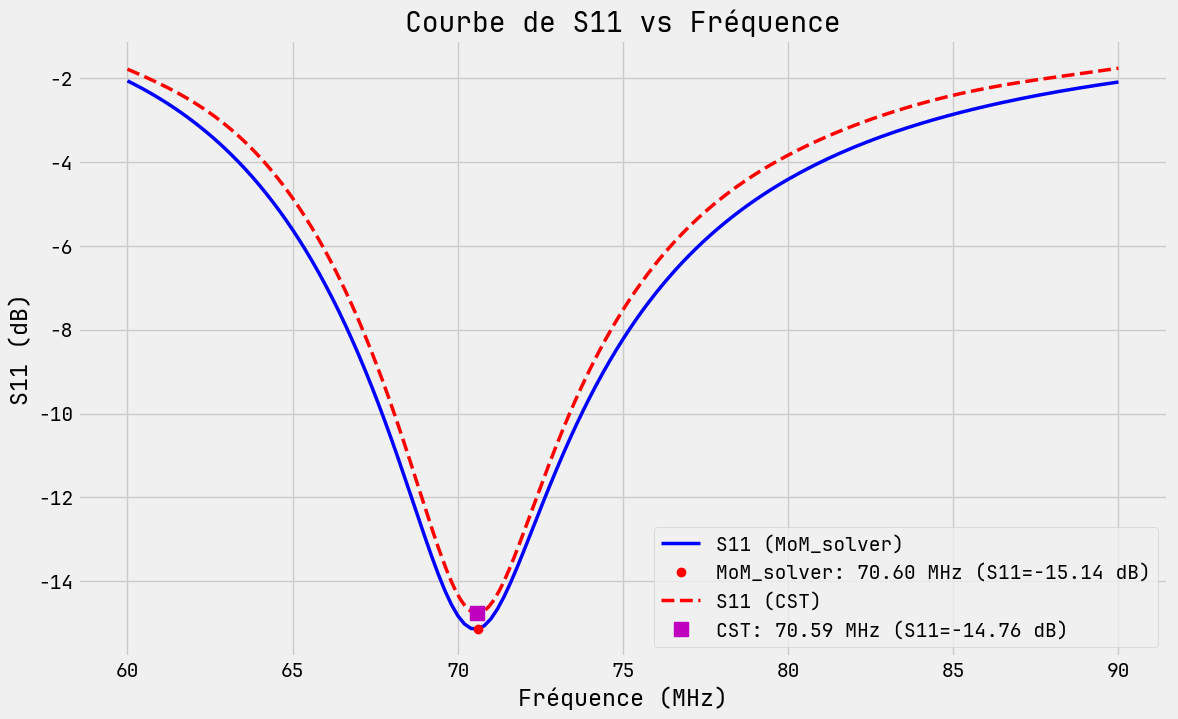

In [7]:
plot_s11_curve_CST_MoM(s11_db, 60e6, 90e6, cst_freq_mhz=cst_freq_mhz, cst_s11_db=cst_s11_db)